In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The following line allows for interactive plotting in Jupyter notebooks
# You need to install the ipympl package and restart your software for this to work
# Comment it out if you don't want interactive plots
%matplotlib widget  

from forced_hkb import forced_hkb_ode, simulate_forced_hkb_grid_params

We are going to simulate a forced Haken-Kelso-Bunz oscillator (Haken, Kelso & Bunz, 1985 for a description of the dynamics of the model; see Fuchs et al., 1996 for a description of the oscillator), defined as:
$$\ddot x + \epsilon \dot x + \omega_0^2 x + \gamma x^2 \dot x + \delta \dot x^3 = F \sin(\omega t) +\sqrt{Q} \xi(t),$$
where $x$, $\dot x$, $\ddot x$ are respectively the state variable, its first derivative and its second derivative; $\omega_0$ is the natural frequency of the oscillator and $\omega$ is the frequency of the forcing. Here, $\xi(t)$ denotes a gaussian white noise with strength $\sqrt{Q}$.

Notice that there is a second derivative and that the system is non autonomous (dependence on time through coupling and noise). Therefore, we need to introduce 2 new dimensions to the model to be able to code it properly (see Strogatz, 2024 section 1.2):
$$\begin{align*}
\dot x_1 & = -\epsilon x_1 - \omega_0^2 x_2 - \gamma x_2^2 x_1 - \delta x_1^3 + F \sin(\omega x_3) + \sqrt{Q} \xi(x_3), \\
\dot x_2 & = x_1, \\
\dot x_3 & = 1.
\end{align*}$$
The third dimension encodes for time and is used in the first dimension of the model.

In [ ]:
# Set list of frequency and coupling strength values for the simulation
frequencies_list = np.arange(1, 5.1, step = 0.1)
coupling_strengths_list = np.arange(0.1, 1.1, step = 0.1)

# Set the intrinsic frequency of the oscillator
omega_0 = 3

t, x_list, phi_rel_list, stats_list = simulate_forced_hkb_grid_params(coupling_strengths_list, frequencies_list, omega_0=omega_0)

Time taken for the first frequency set: 0.02 minutes
Estimated time for the entire simulation: 0.97 minutes
Simulation progress: 10% (time elapsed: 0.10 minutes)
Simulation progress: 20% (time elapsed: 0.20 minutes)
Simulation progress: 30% (time elapsed: 0.30 minutes)
Simulation progress: 40% (time elapsed: 0.39 minutes)
Simulation progress: 50% (time elapsed: 0.49 minutes)
Simulation progress: 60% (time elapsed: 0.59 minutes)
Simulation progress: 70% (time elapsed: 0.69 minutes)
Simulation progress: 80% (time elapsed: 0.79 minutes)
Simulation progress: 90% (time elapsed: 0.88 minutes)
Total simulation time: 0.98 minutes


Text(0, 0.5, '$\\phi$ (radians)')

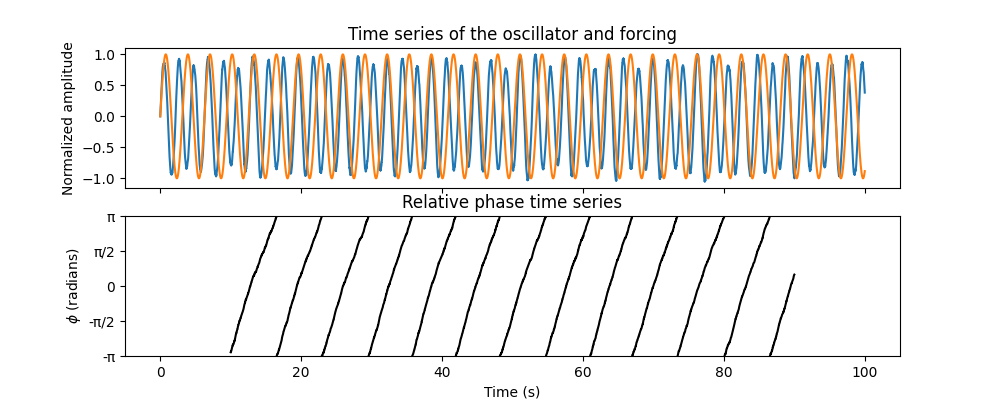

In [34]:
# Select coupling strength
F_idx = 2
F = coupling_strengths_list[F_idx] 

# Select frequency
freq_idx = 10
freq = frequencies_list[freq_idx] 
forcing_series = np.sin(freq * t)

# Get the time series for the selected parameters
x = x_list[:, F_idx, freq_idx,]
phi_rel = phi_rel_list[:, F_idx, freq_idx,]

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

axs[0].plot(t, x / max(x), label="Oscillator")
axs[0].plot(t, forcing_series, label="Forcing")
axs[0].set_title("Time series of the oscillator and forcing")
axs[0].set_ylabel("Normalized amplitude")

axs[1].plot(t[1000:-1000], phi_rel[1000:-1000], color="k")
axs[1].set_ylim([-np.pi, np.pi])
axs[1].set_title("Relative phase time series")
axs[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
               labels=["-π", "-π/2", "0", "π/2", "π"])
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel(r"$\phi$ (radians)")


Text(0.5, 0, 'Frequency')

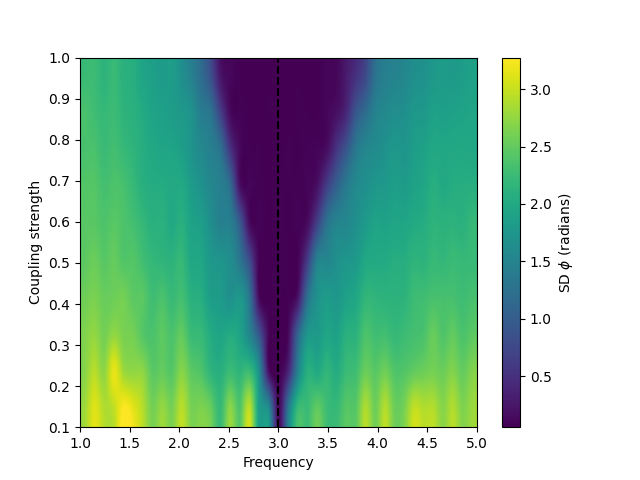

In [37]:
# Plot the dispersion of relative phase as a function of frequency and coupling strength
plt.figure()
plt.imshow(
    stats_list[0,:,:], 
    origin = 'lower',
    extent=[frequencies_list[0], frequencies_list[-1], coupling_strengths_list[0], coupling_strengths_list[-1]],
    interpolation = "spline16", 
    aspect = 'auto'
)
plt.axvline(omega_0, color='k', linestyle='--')
plt.colorbar(label=r'SD $\phi$ (radians)')
plt.ylabel("Coupling strength")
plt.xlabel("Frequency")

# References

Haken, H., Kelso, J. A. S., & Bunz, H. (1985). A theoretical model of phase transitions in human hand movements. *Biological Cybernetics, 51*(5), Article 5. https://doi.org/10.1007/BF00336922

Fuchs, A., Jirsa, V. K., Haken, H., & Kelso, J. A. S. (1996). Extending the HKB-Model of coordinated movement to  oscillators with different eigenfrequencies. *Biological Cybernetics, 74*, 21-30. https://doi.org/10.1007/BF00199134

Strogatz, S. H. (2024). *Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering* (3rd ed.). CRC Press. https://doi.org/10.1201/9780429492563
